## Data Acquisition

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("berkshire.csv")
df1 = pd.read_csv("moderna.csv")
df2 = pd.read_csv("S&P500.csv")
print(df.head())
print(df1.head())
print(df2.head())

         Date          Open          High           Low         Close  \
0  2022-12-05   475,080.00    476,689.00    466,160.00    468,700.00    
1  2022-12-06   467,175.00    469,659.00    462,422.00    464,838.00    
2  2022-12-07   464,303.00    467,081.00    460,408.00    461,593.00    
3  2022-12-08   462,436.00    464,619.00    460,612.00    462,780.00    
4  2022-12-09   461,773.00    466,120.00    459,402.00    463,000.00    

      Adj Close      Volume  
0   468,700.00    4,100.00   
1   464,838.00    2,700.00   
2   461,593.00    2,900.00   
3   462,780.00    2,600.00   
4   463,000.00    2,800.00   
         Date    Open    High     Low   Close  Adj Close          Volume
0  2022-12-05  180.99  183.68  173.59  175.93     175.93   3,525,400.00 
1  2022-12-06  175.02  175.78  169.70  173.54     173.54   3,392,300.00 
2  2022-12-07  172.31  180.38  171.85  179.00     179.00   3,579,300.00 
3  2022-12-08  179.12  185.21  177.52  184.70     184.70   3,414,000.00 
4  2022-12-09  1

In [34]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       251 non-null    object
 1   Open       251 non-null    object
 2   High       251 non-null    object
 3   Low        251 non-null    object
 4   Close      251 non-null    object
 5   Adj Close  251 non-null    object
 6   Volume     251 non-null    object
dtypes: object(7)
memory usage: 13.9+ KB
None


In [35]:
# Checking for missing values
df.isnull().sum().info()
df1.isnull().sum().info()
df2.isnull().sum().info()

# Filling missing values using forward fill
df.fillna(method='ffill', inplace=True)
df1.fillna(method='ffill', inplace=True)
df2.fillna(method='ffill', inplace=True)

<class 'pandas.core.series.Series'>
Index: 7 entries, Date to Volume
Series name: None
Non-Null Count  Dtype
--------------  -----
7 non-null      int64
dtypes: int64(1)
memory usage: 412.0+ bytes
<class 'pandas.core.series.Series'>
Index: 7 entries, Date to Volume
Series name: None
Non-Null Count  Dtype
--------------  -----
7 non-null      int64
dtypes: int64(1)
memory usage: 412.0+ bytes
<class 'pandas.core.series.Series'>
Index: 7 entries, Date to Volume
Series name: None
Non-Null Count  Dtype
--------------  -----
7 non-null      int64
dtypes: int64(1)
memory usage: 412.0+ bytes


In [36]:
df['Date'] = pd.to_datetime(df['Date'])
df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])

# Remove commas and convert 'Open' and 'Close' columns to numeric
df['Open'] = pd.to_numeric(df['Open'].str.replace(',', ''), errors='coerce')
df['Close'] = pd.to_numeric(df['Close'].str.replace(',', ''), errors='coerce')
df['High'] = pd.to_numeric(df['High'].str.replace(',', ''), errors='coerce')
df['Low'] = pd.to_numeric(df['Low'].str.replace(',', ''), errors='coerce')
df['Volume'] = pd.to_numeric(df['Volume'].str.replace(',', ''), errors='coerce')
df['Adj Close'] = pd.to_numeric(df['Adj Close'].str.replace(',', ''), errors='coerce')

df1['Open'] = pd.to_numeric(df1['Open'])
df1['Close'] = pd.to_numeric(df1['Close'])
df1['High'] = pd.to_numeric(df1['High'])
df1['Low'] = pd.to_numeric(df1['Low'])
df1['Volume'] = pd.to_numeric(df1['Volume'].str.replace(',', ''), errors='coerce')
df1['Adj Close'] = pd.to_numeric(df1['Adj Close'])

df2['Open'] = pd.to_numeric(df2['Open'].str.replace(',', ''), errors='coerce')
df2['Close'] = pd.to_numeric(df2['Close'].str.replace(',', ''), errors='coerce')
df2['High'] = pd.to_numeric(df2['High'].str.replace(',', ''), errors='coerce')
df2['Low'] = pd.to_numeric(df2['Low'].str.replace(',', ''), errors='coerce')
df2['Volume'] = pd.to_numeric(df2['Volume'].str.replace(',', ''), errors='coerce')
df2['Adj Close'] = pd.to_numeric(df2['Adj Close'].str.replace(',', ''), errors='coerce')

In [37]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       251 non-null    datetime64[ns]
 1   Open       251 non-null    float64       
 2   High       251 non-null    float64       
 3   Low        251 non-null    float64       
 4   Close      251 non-null    float64       
 5   Adj Close  251 non-null    float64       
 6   Volume     251 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 13.9 KB
None


In [38]:
# Removing duplicate rows
print(df.drop_duplicates(inplace=True))
print(df1.drop_duplicates(inplace=True))
print(df2.drop_duplicates(inplace=True))

None
None
None


In [39]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())
print("Missing Values:\n", df1.isnull().sum())
print("Missing Values:\n", df2.isnull().sum())

# Display cleaned DataFrame
print("\nCleaned and Preprocessed Data:\n", df)
print("\nCleaned and Preprocessed Data:\n", df1)
print("\nCleaned and Preprocessed Data:\n", df2)

Missing Values:
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Missing Values:
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Missing Values:
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       1
dtype: int64

Cleaned and Preprocessed Data:
           Date      Open      High       Low     Close  Adj Close   Volume
0   2022-12-05  475080.0  476689.0  466160.0  468700.0   468700.0   4100.0
1   2022-12-06  467175.0  469659.0  462422.0  464838.0   464838.0   2700.0
2   2022-12-07  464303.0  467081.0  460408.0  461593.0   461593.0   2900.0
3   2022-12-08  462436.0  464619.0  460612.0  462780.0   462780.0   2600.0
4   2022-12-09  461773.0  466120.0  459402.0  463000.0   463000.0   2800.0
..         ...       ...       ...       ...       ...        ...      ...
246 2023-11-28  547930.0  549189.0  5

## Analysis 

Text(0.5, 1.0, 'Volume Berkshire')

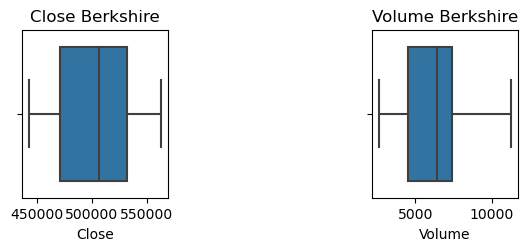

In [40]:
# outliers
#Berkshire Boxplot

plt.subplot(2, 3, 4)
sns.boxplot(x=df['Close'])
plt.title('Close Berkshire')

plt.subplot(2, 3, 6)
sns.boxplot(x=df['Volume'])
plt.title('Volume Berkshire')

Text(0.5, 1.0, 'Volume Moderna')

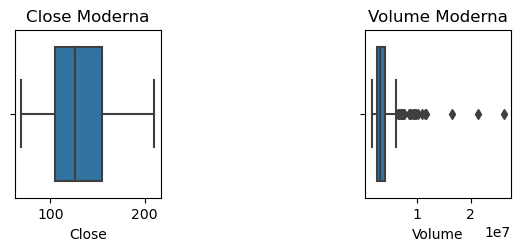

In [41]:
#Moderna Boxplot

plt.subplot(2, 3, 4)
sns.boxplot(x=df1['Close'])
plt.title('Close Moderna')

plt.subplot(2, 3, 6)
sns.boxplot(x=df1['Volume'])
plt.title('Volume Moderna')

Text(0.5, 1.0, 'Close S&P 500')

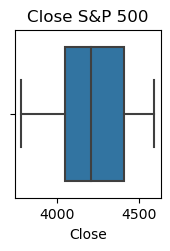

In [42]:
#S&P 500 Boxplot
plt.subplot(2, 3, 6)
sns.boxplot(x=df2['Close'])
plt.title('Close S&P 500')

Text(0.5, 1.0, 'Volume S&P 500')

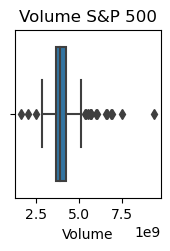

In [43]:
#S&P 500 Boxplot
plt.subplot(2, 3, 6)
sns.boxplot(x=df2['Volume'])
plt.title('Volume S&P 500')

## Exploratory Data Analysis (EDA) & Data Visualization

Summary Statistics:
                                Date           Open           High  \
count                            251     251.000000     251.000000   
mean   2023-06-05 10:48:17.211155456  503988.374502  507691.007968   
min              2022-12-05 00:00:00  446749.000000  455608.000000   
25%              2023-03-07 12:00:00  473014.500000  475011.500000   
50%              2023-06-06 00:00:00  505890.000000  511180.000000   
75%              2023-09-05 12:00:00  532483.000000  535753.000000   
max              2023-12-04 00:00:00  563549.000000  566570.000000   
std                              NaN   31930.216977   31825.155902   

                 Low          Close      Adj Close        Volume  
count     251.000000     251.000000     251.000000    251.000000  
mean   499536.996016  503573.633466  503573.633466   6198.007968  
min    442363.000000  442765.000000  442765.000000   2600.000000  
25%    466514.000000  471500.000000  471500.000000   4550.000000  
50%    502000.

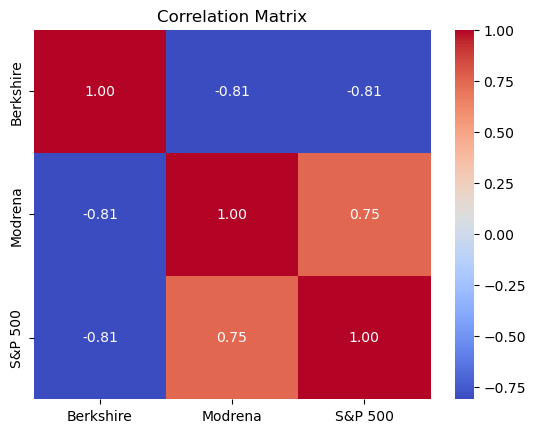

In [44]:
# Visualization
import numpy as np
df2 = df2.sort_values('Date')
print("Summary Statistics:")
print(df.describe())

print("Summary Statistics:")
print(df1.describe())

print("Summary Statistics:")
print(df2.describe())

col1 = df['Close']
col2 = df1['Close']
col3 = df2['Close']
# Correlation matrix
correlation_data =pd.concat([col1,col2,col3], axis=1)
correlation_data.columns = ['Berkshire','Modrena', 'S&P 500']
correlation_matrix = correlation_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

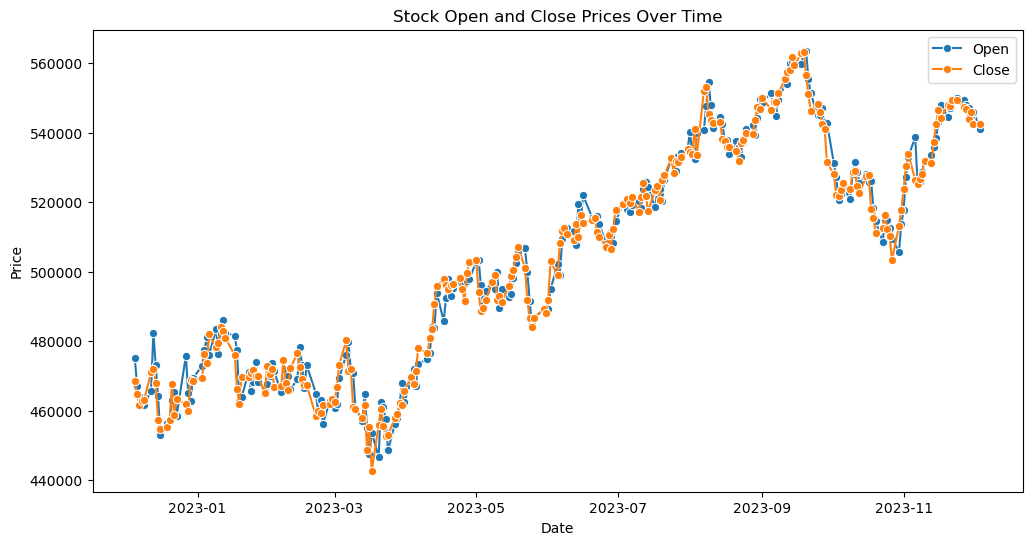

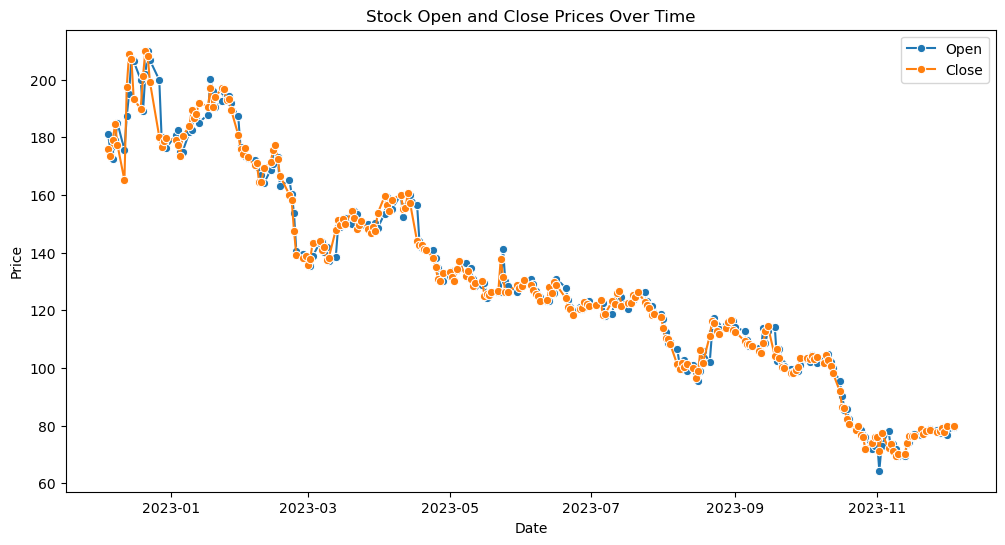

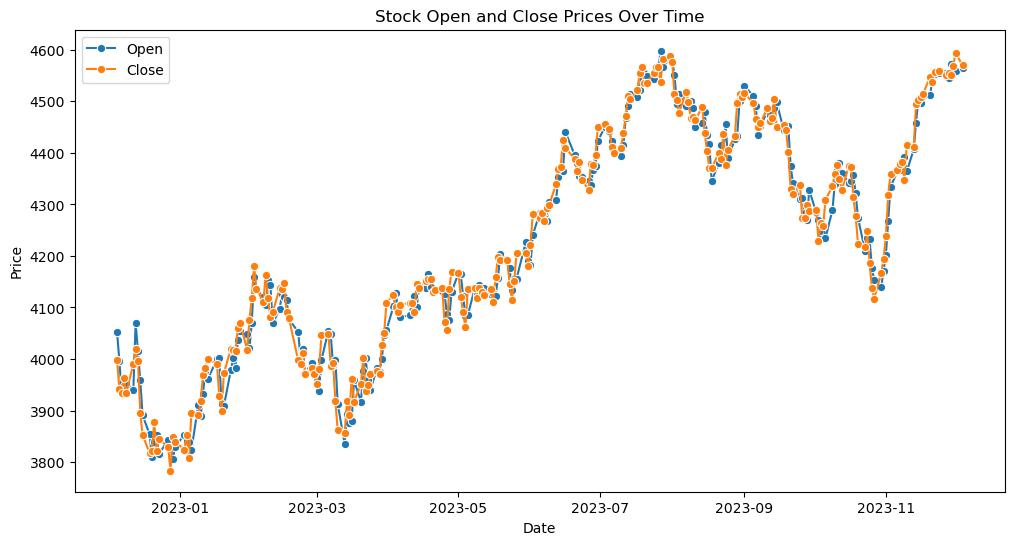

In [45]:
# Line plot of stock prices over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Open', marker='o', linestyle='-', label='Open')
sns.lineplot(data=df, x='Date', y='Close', marker='o', linestyle='-', label='Close')
plt.title('Stock Open and Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df1, x='Date', y='Open', marker='o', linestyle='-', label='Open')
sns.lineplot(data=df1, x='Date', y='Close', marker='o', linestyle='-', label='Close')
plt.title('Stock Open and Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df2, x='Date', y='Open', marker='o', linestyle='-', label='Open')
sns.lineplot(data=df2, x='Date', y='Close', marker='o', linestyle='-', label='Close')
plt.title('Stock Open and Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Mean Squared Error: 265669884.78568342


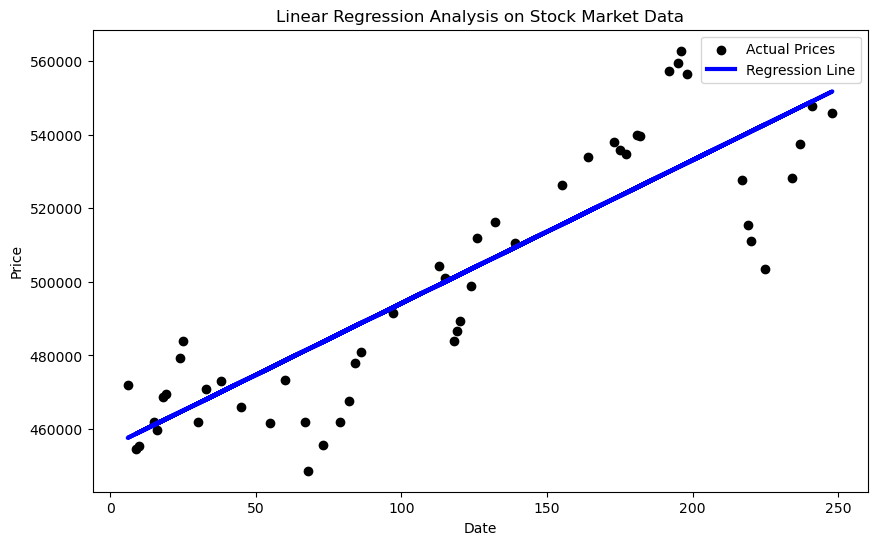

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'])

X = df.index.values.reshape(-1, 1)
y = df['Close'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='black', label='Actual Prices')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Regression Line')
plt.title('Linear Regression Analysis on Stock Market Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

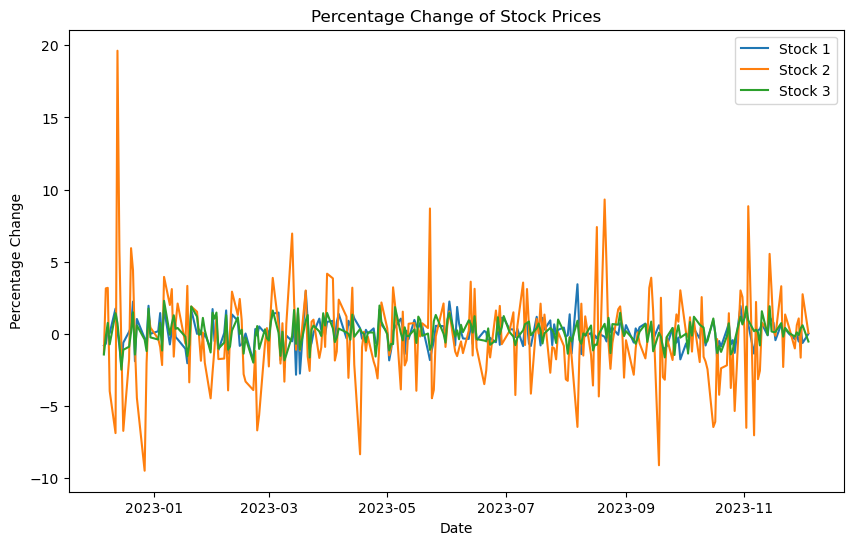

In [47]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

df1['Date'] = pd.to_datetime(df1['Date'])
df1.set_index('Date', inplace=True)

df2['Date'] = pd.to_datetime(df2['Date'])
df2.set_index('Date', inplace=True)

# Calculate the percentage change for each dataset
df['Percentage Change'] = df['Close'].pct_change() * 100
df1['Percentage Change'] = df1['Close'].pct_change() * 100
df2['Percentage Change'] = df2['Close'].pct_change() * 100

# Plot the percentage change on one graph
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x=df.index, y='Percentage Change', label='Stock 1')
sns.lineplot(data=df1, x=df1.index, y='Percentage Change', label='Stock 2')
sns.lineplot(data=df2, x=df2.index, y='Percentage Change', label='Stock 3')

# Customize the plot
plt.title('Percentage Change of Stock Prices')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.legend()

# Show the plot
plt.show()